In [3]:
import pandas as pd
from pathlib import Path
%matplotlib inline

In [4]:
all_raw_flight_data = pd.read_csv(Path('Data/Raw/On_Time_On_Time_Performance_2018_4.csv'),usecols=['FlightDate',
                                                                                                   'UniqueCarrier',
                                                                                                   'FlightNum',
                                                                                                   'Origin',
                                                                                                   'OriginCityName',
                                                                                                   'OriginStateName',
                                                                                                   'Dest',
                                                                                                   'DestCityName',
                                                                                                   'DestStateName',
                                                                                                   'CRSDepTime',
                                                                                                   'DepTime',
                                                                                                   'DepDelay',
                                                                                                   'TaxiOut',
                                                                                                   'WheelsOff',
                                                                                                   'WheelsOn',
                                                                                                   'TaxiIn',
                                                                                                   'CRSArrTime',
                                                                                                   'ArrTime',
                                                                                                   'ArrDelay',
                                                                                                   'AirTime',
                                                                                                   'Distance',
                                                                                                   'CarrierDelay',
                                                                                                   'WeatherDelay',
                                                                                                   'NASDelay',
                                                                                                   'SecurityDelay',
                                                                                                   'LateAircraftDelay',])
all_raw_flight_data.head()

,FlightDate,UniqueCarrier,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,CRSDepTime,...,CRSArrTime,ArrTime,ArrDelay,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2018-04-16,WN,1253,OAK,"Oakland, CA",California,LGB,"Long Beach, CA",California,2005,...,2125,2130.0,5.0,55.0,353.0,NaN,NaN,NaN,NaN,NaN
1,2018-04-16,WN,1448,OAK,"Oakland, CA",California,LGB,"Long Beach, CA",California,1215,...,1335,1343.0,8.0,61.0,353.0,NaN,NaN,NaN,NaN,NaN
2,2018-04-16,WN,1604,OAK,"Oakland, CA",California,LGB,"Long Beach, CA",California,900,...,1020,1018.0,-2.0,63.0,353.0,NaN,NaN,NaN,NaN,NaN
3,2018-04-16,WN,5827,OAK,"Oakland, CA",California,LGB,"Long Beach, CA",California,1755,...,1915,1940.0,25.0,60.0,353.0,0.0,0.0,0.0,0.0,25.0
4,2018-04-16,WN,2112,OAK,"Oakland, CA",California,MCI,"Kansas City, MO",Missouri,1215,...,1740,1810.0,30.0,160.0,1489.0,0.0,0.0,0.0,0.0,30.0


In [5]:
all_raw_flight_data['FlightDate'] = all_raw_flight_data['FlightDate'].astype('datetime64')
all_raw_flight_data.dtypes

FlightDate           datetime64[ns]
UniqueCarrier                object
FlightNum                     int64
Origin                       object
OriginCityName               object
OriginStateName              object
Dest                         object
DestCityName                 object
DestStateName                object
CRSDepTime                    int64
DepTime                     float64
DepDelay                    float64
TaxiOut                     float64
WheelsOff                   float64
WheelsOn                    float64
TaxiIn                      float64
CRSArrTime                    int64
ArrTime                     float64
ArrDelay                    float64
AirTime                     float64
Distance                    float64
CarrierDelay                float64
WeatherDelay                float64
NASDelay                    float64
SecurityDelay               float64
LateAircraftDelay           float64
dtype: object

In [6]:
all_raw_flight_data.shape

(596046, 26)

In [7]:
all_raw_flight_data.isnull().sum()

FlightDate                0
UniqueCarrier             0
FlightNum                 0
Origin                    0
OriginCityName            0
OriginStateName           0
Dest                      0
DestCityName              0
DestStateName             0
CRSDepTime                0
DepTime                5988
DepDelay               6618
TaxiOut                6187
WheelsOff              6186
WheelsOn               6427
TaxiIn                 6427
CRSArrTime                0
ArrTime                6427
ArrDelay               7821
AirTime                7475
Distance                  0
CarrierDelay         492241
WeatherDelay         492241
NASDelay             492241
SecurityDelay        492241
LateAircraftDelay    492241
dtype: int64

In [8]:
all_raw_flight_data.dropna(subset=['DepTime','DepDelay','ArrTime','ArrDelay'],inplace=True)
total_flight_count = all_raw_flight_data.shape[0]

In [13]:
all_raw_flight_data['WeatherDelay'].fillna(value=0,inplace=True)
all_raw_flight_data['CarrierDelay'].fillna(value=0,inplace=True)
all_raw_flight_data['SecurityDelay'].fillna(value=0,inplace=True)
all_raw_flight_data['LateAircraftDelay'].fillna(value=0,inplace=True)
all_raw_flight_data['NASDelay'].fillna(value=0,inplace=True)
all_raw_flight_data.isnull().sum()

FlightDate           0
UniqueCarrier        0
FlightNum            0
Origin               0
OriginCityName       0
OriginStateName      0
Dest                 0
DestCityName         0
DestStateName        0
CRSDepTime           0
DepTime              0
DepDelay             0
TaxiOut              0
WheelsOff            0
WheelsOn             0
TaxiIn               0
CRSArrTime           0
ArrTime              0
ArrDelay             0
AirTime              0
Distance             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [14]:
#Codes from https://www.census.gov/foreign-trade/reference/codes/aircarrier/ac3.txt
AIRLINE_CODES = {'WN': 'Southwest',
                 'DL': 'Delta',
                 'AA': 'American',
                 'OO': 'SkyWest',
                 'UA': 'United',
                 'YX': 'Midwest',
                 'B6': 'JetBlue',
                 'MQ': 'American Eagle',
                 'OH': 'Comair',
                 'AS': 'Alaska',
                 '9E': 'Pinnacle',
                 'EV': 'Atlantic Southeast',
                 'YV': 'Mesa',
                 'NK': 'Spirit',
                 'F9': 'Frontier',
                 'G4': 'Allegiant',
                 'HA': 'Hawaiian'}

In [23]:
all_raw_flight_data['Airline'] = all_raw_flight_data.apply(lambda row: AIRLINE_CODES[row['UniqueCarrier']],axis=1)
all_raw_flight_data['Airline'].head()
all_raw_flight_data.reset_index().to_feather(Path('Data/Processed/all_flight_data.feather'))

In [16]:
flight_count_by_airline = all_raw_flight_data['Airline'].value_counts()
flight_count_by_airline = flight_count_by_airline.to_frame()
flight_count_by_airline.columns = ['Flight Count']
flight_count_by_airline.index.rename('Airline',inplace=True)
flight_count_by_airline.sort_index(inplace=True)

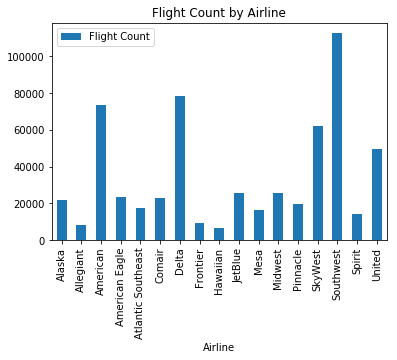

In [17]:
flight_count_by_airline.plot.bar(title='Flight Count by Airline')

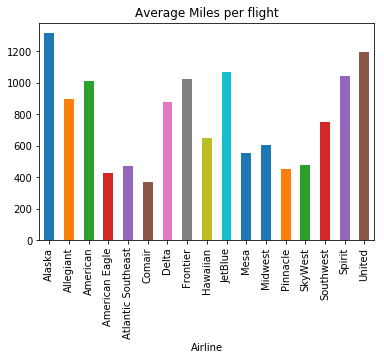

In [18]:
average_distance_per_flight_per_carrier = all_raw_flight_data.groupby('Airline')['Distance'].mean().round(2)
average_distance_per_flight_per_carrier = average_distance_per_flight_per_carrier.sort_index()
average_distance_per_flight_per_carrier.plot.bar(title='Average Miles per flight')

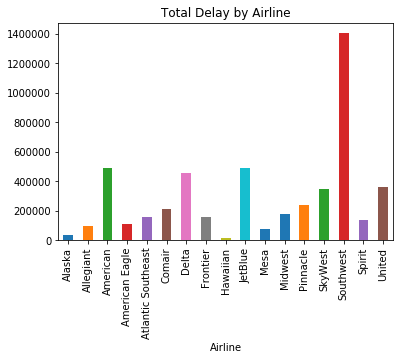

In [19]:
departure_delay_by_airline = all_raw_flight_data.groupby('Airline')['DepDelay'].sum()
departure_delay_by_airline.sort_index(inplace=True)
departure_delay_by_airline.plot.bar(title='Total Delay by Airline')

In [20]:
nondelayed_total_flight_count = all_raw_flight_data[(all_raw_flight_data['DepDelay'] <= 0)].shape[0]
delayed_total_flight_count = all_raw_flight_data[(all_raw_flight_data['DepDelay'] > 0)].shape[0]
print(nondelayed_total_flight_count / total_flight_count)
print(delayed_total_flight_count / total_flight_count)
print(delayed_total_flight_count)
delayed_flights_by_airline = all_raw_flight_data[(all_raw_flight_data['DepDelay'] > 0)]['Airline'].value_counts().sort_index()
delayed_flights_by_airline.head()

0.6725383151868706
0.32746168481312943
192425


Alaska                 5433
Allegiant              2677
American              21994
American Eagle         5786
Atlantic Southeast     4091
Name: Airline, dtype: int64

In [21]:
temp_airlines = {'Airline':all_raw_flight_data['Airline'].unique()}
airline_carriers = pd.DataFrame(temp_airlines).set_index('Airline').sort_index()
airline_carriers['Flight Count'] = flight_count_by_airline.sort_index().values
airline_carriers['Average Flight Length'] = average_distance_per_flight_per_carrier.values
airline_carriers['Total Departure Delay Minutes'] = departure_delay_by_airline.values
airline_carriers['Average Delay per Flight'] = airline_carriers['Total Departure Delay Minutes'] / airline_carriers['Flight Count']
airline_carriers['Total Delayed Flights'] = delayed_flights_by_airline.values
airline_carriers['Average Delay per Delayed Flight'] = airline_carriers['Total Departure Delay Minutes'] / airline_carriers['Total Delayed Flights']
airline_carriers['Percent of Delayed Flights'] = airline_carriers['Total Delayed Flights'] / airline_carriers['Flight Count']
airline_carriers

,Flight Count,Average Flight Length,Total Departure Delay Minutes,Average Delay per Flight,Total Delayed Flights,Average Delay per Delayed Flight,Percent of Delayed Flights
Airline,,,,,,,
Alaska,21805,1317.26,36101.0,1.655629,5433,6.644763,0.249163
Allegiant,8094,895.22,94202.0,11.638498,2677,35.189391,0.330739
American,73767,1010.38,487493.0,6.608551,21994,22.164818,0.298155
American Eagle,23426,428.13,110962.0,4.736703,5786,19.177670,0.246991
Atlantic Southeast,17350,470.68,153728.0,8.860403,4091,37.577121,0.235793
Comair,22789,371.10,210313.0,9.228707,8206,25.629174,0.360086
Delta,78607,876.41,453773.0,5.772679,22098,20.534573,0.281120
Frontier,9513,1027.14,154746.0,16.266793,3669,42.176615,0.385683
Hawaiian,6723,650.69,10642.0,1.582924,1779,5.982012,0.264614


In [22]:
delayed_flight_data = all_raw_flight_data[(all_raw_flight_data['DepDelay'] > 0)].reset_index()
print(delayed_flight_data.shape[0])
nondelayed_flight_data = all_raw_flight_data[all_raw_flight_data['DepDelay'] <= 0].reset_index()
print(nondelayed_flight_data.shape[0])
delayed_flight_data.to_feather(Path('Data/Processed/all_delayed_flight_data.feather'))
nondelayed_flight_data.to_feather(Path('Data/Processed/all_nondelayed_flight_data.feather'))

192425
395201
